In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # import the image module

A = mpimg.imread("bw.png") # read the image into an array A
A = np.mean(A, axis=2)

print(np.round(A, 2)) # print x, rounding to 2 d.p.

[[0.27 0.35 0.27 0.37 0.31 0.25 0.29 0.29]
 [0.37 0.46 0.51 0.53 0.45 0.31 0.3  0.28]
 [0.45 0.6  0.75 0.8  0.57 0.43 0.34 0.31]
 [0.46 0.76 0.9  0.89 0.82 0.45 0.32 0.34]
 [0.51 0.79 0.9  0.92 0.75 0.49 0.43 0.29]
 [0.44 0.56 0.75 0.76 0.59 0.56 0.62 0.42]
 [0.36 0.48 0.49 0.47 0.45 0.61 1.   0.56]
 [0.28 0.34 0.31 0.26 0.31 0.4  0.49 0.37]]


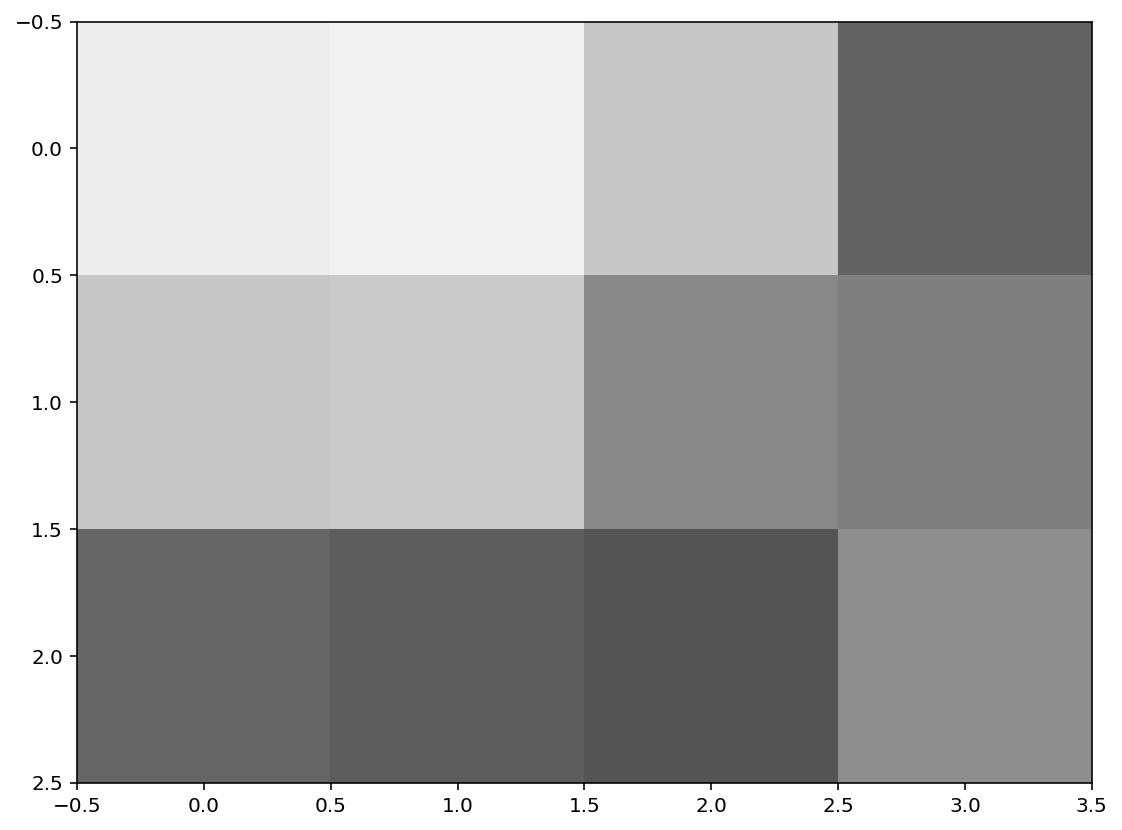

In [8]:
A_cropped = A[4:7, 2:6]

plt.imshow(A_cropped, 
            cmap=plt.get_cmap('Greys_r') )

# NB This line ensures that the colour scaling remains consistent regardless of cropping
plt.clim(np.amin(A), np.amax(A))

In [9]:
print("Min:", np.min(A))
print("Max:", np.max(A))

Min: 0.25
Max: 1.0


In [15]:
A_threshold = (A > 0.7).astype(int)
print(A_threshold)

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0]
 [0 1 1 1 1 0 0 0]
 [0 1 1 1 1 0 0 0]
 [0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0]]


[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0]
 [0 1 1 1 1 0 0 0]
 [0 1 1 1 1 0 0 0]
 [0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0]]


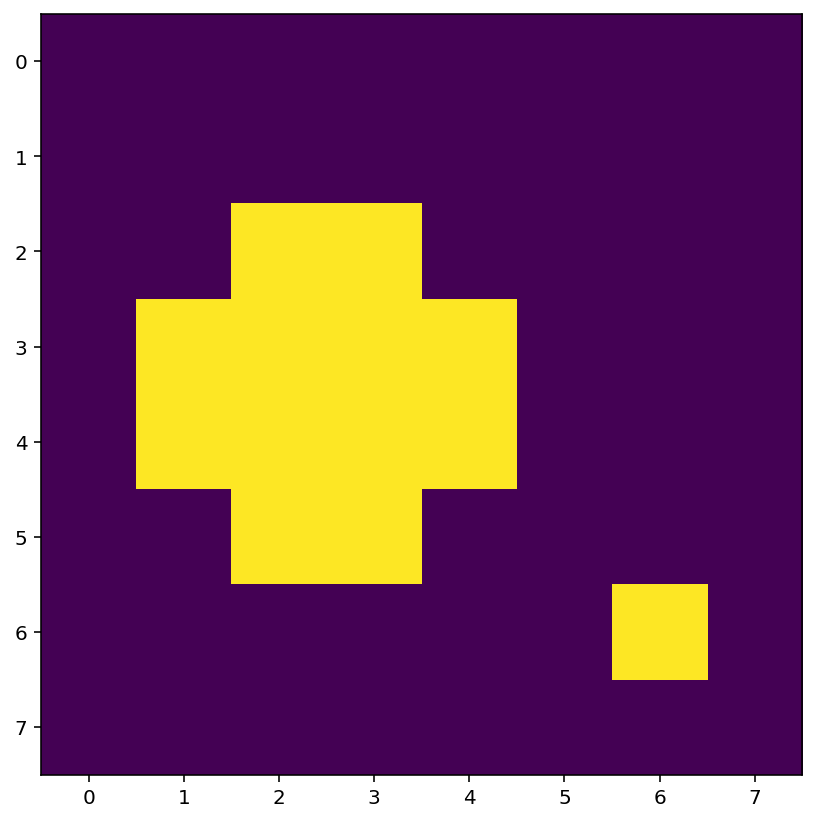

In [16]:
A_threshold = (A > 0.7).astype(int)
print(A_threshold)
plt.imshow(A_threshold)

In [17]:
import scipy.ndimage as sn # import the scipy.ndimage package

# Label the connected components (blobs) of binary image A_threshold
A_labels, n = sn.label(A_threshold) 
print("number of blobs:", n)

# Count the number of pixels in each blob and return as array "sizes"
sizes = sn.sum(A_threshold, A_labels, range(1, n+1))
print("sizes:", sizes)

# Get the index of the largest value in sizes (corresponding to the largest blob)
idx = np.argmax(sizes) 
print("index:", idx)

# Determine the co-ordinates of the largest blob (returned as row, column indices)
y_pos, x_pos = sn.center_of_mass(A_threshold, A_labels, idx + 1) 
print("co-ordinates of largest blob:", x_pos, y_pos)

number of blobs: 2
sizes: [12.  1.]
index: 0
co-ordinates of largest blob: 2.5 3.5


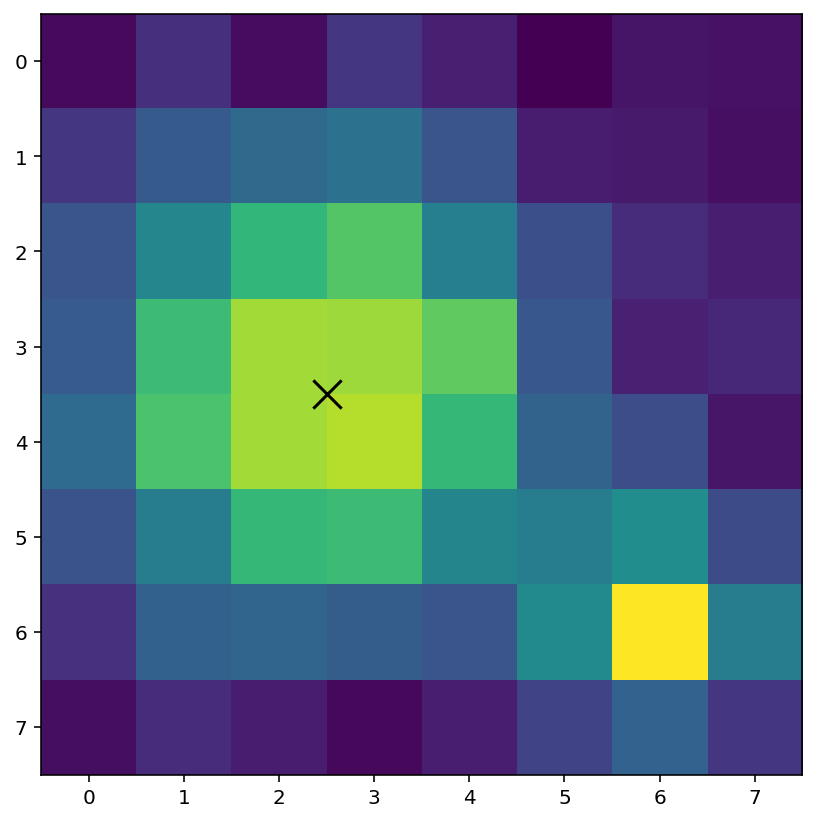

In [18]:
plt.imshow(A) # show the original image
plt.scatter(x_pos, y_pos, color="black", marker="x", s=200)

In [19]:
def largest_blob_coords(image, thresh):
    # Threshold the image
    bw = (image > thresh).astype(int)
    # Label the blobs
    labels, n = sn.label(bw)
    
    # Remaining code ...
    
    return x_pos, y_pos

In [20]:
A = mpimg.imread("bw.png")
A = np.mean(A, axis=2)

x, y = largest_blob_coords(A, 0.7)
print(x,y)

# should print 2.5 3.5

2.5 3.5


In [21]:
B = mpimg.imread("frame0.png") # read the image into an array A
B = np.mean(B, axis=2)

print(np.round(B, 2)) # print x, rounding to 2 d.p.

[[0.47 0.47 0.47 ... 0.48 0.47 0.47]
 [0.47 0.47 0.47 ... 0.48 0.47 0.47]
 [0.46 0.47 0.47 ... 0.48 0.48 0.48]
 ...
 [0.48 0.49 0.49 ... 0.45 0.46 0.46]
 [0.47 0.47 0.48 ... 0.45 0.46 0.46]
 [0.46 0.47 0.47 ... 0.45 0.46 0.46]]


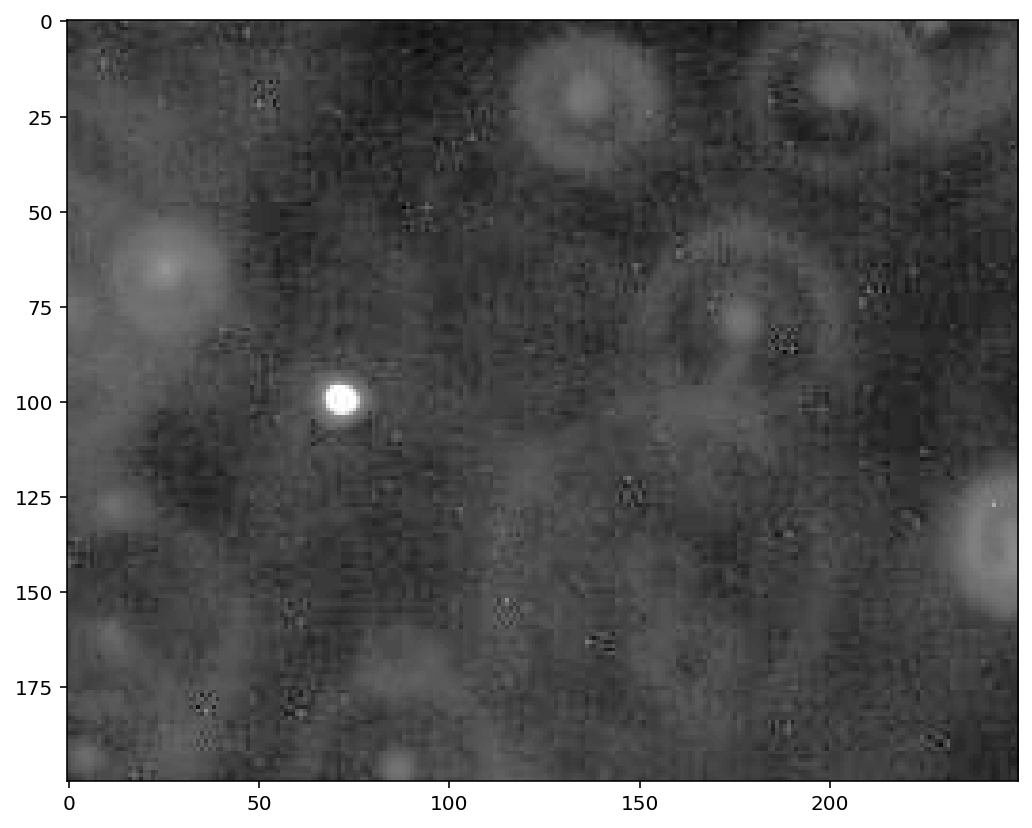

In [23]:
plt.imshow(B, 
            cmap=plt.get_cmap('Greys_r') )

# NB This line ensures that the colour scaling remains consistent regardless of cropping
plt.clim(np.amin(B), np.amax(B))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


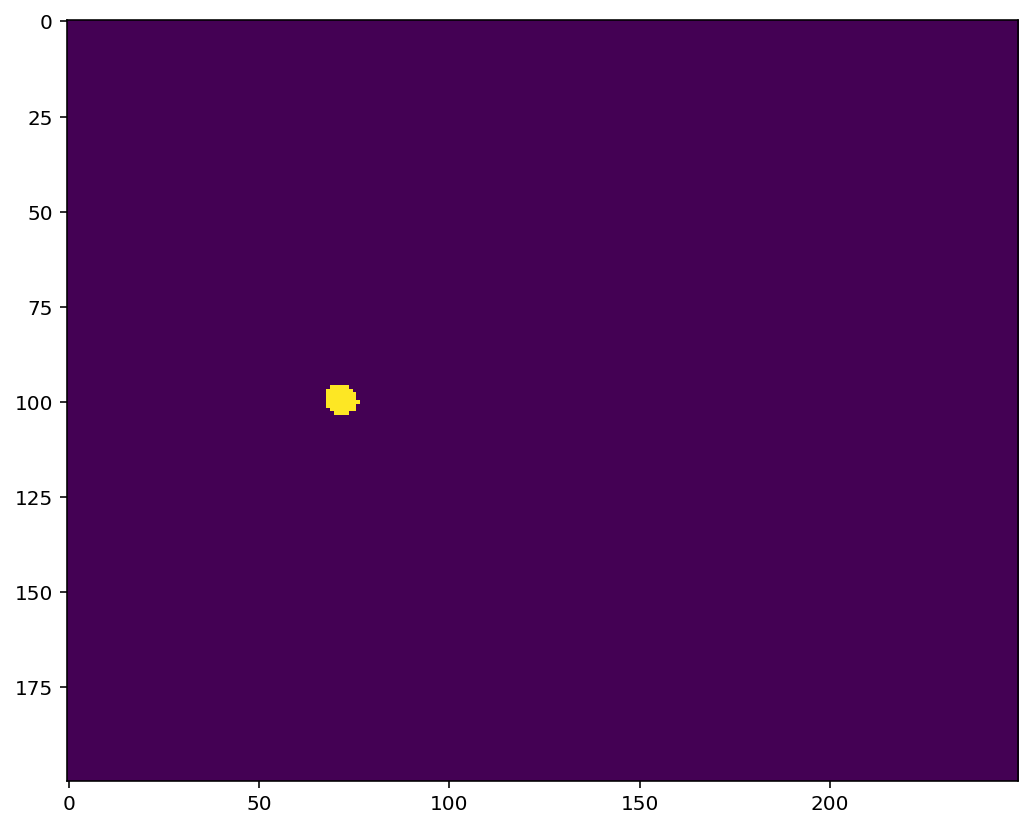

In [28]:
B_threshold = (B > 0.65).astype(int)
print(B_threshold)
plt.imshow(B_threshold)

In [29]:
# Label the connected components (blobs) of binary image A_threshold
B_labels, n = sn.label(B_threshold) 
print("number of blobs:", n)

# Count the number of pixels in each blob and return as array "sizes"
sizes = sn.sum(B_threshold, B_labels, range(1, n+1))
print("sizes:", sizes)

# Get the index of the largest value in sizes (corresponding to the largest blob)
idx = np.argmax(sizes) 
print("index:", idx)

# Determine the co-ordinates of the largest blob (returned as row, column indices)
y_pos, x_pos = sn.center_of_mass(B_threshold, B_labels, idx + 1) 
print("co-ordinates of largest blob:", x_pos, y_pos)

number of blobs: 1
sizes: [56.]
index: 0
co-ordinates of largest blob: 71.53571428571429 99.44642857142857


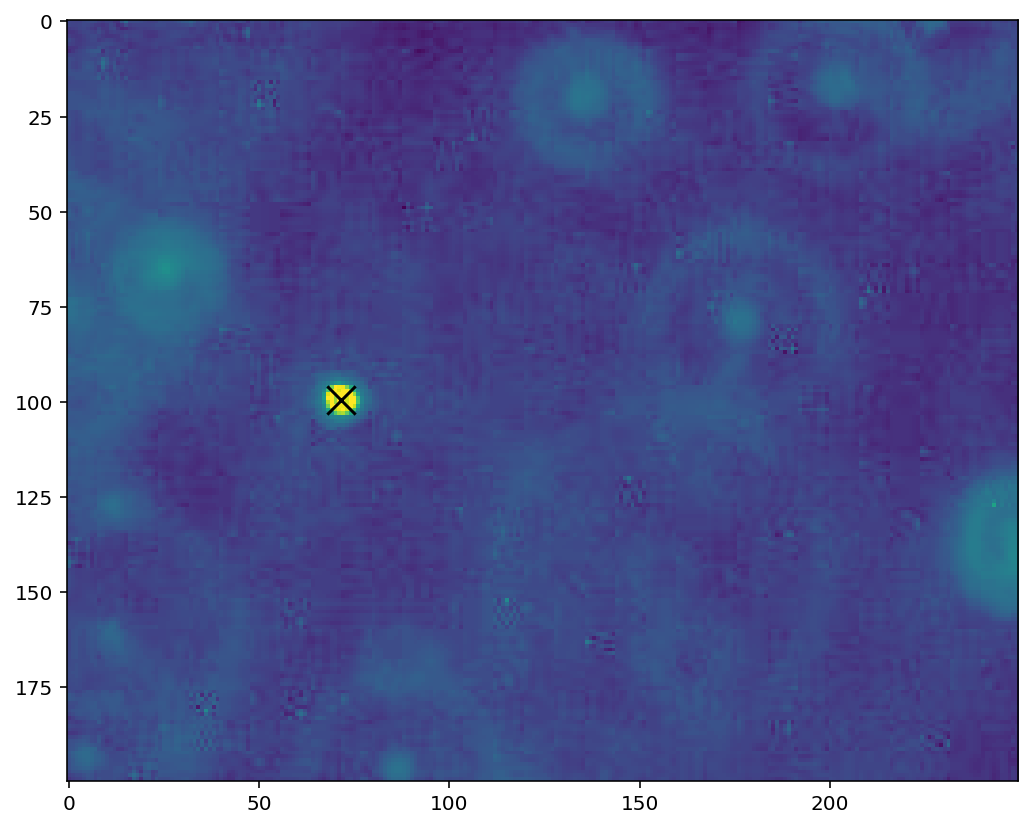

In [30]:
plt.imshow(B) # show the original image
plt.scatter(x_pos, y_pos, color="black", marker="x", s=200)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

cap = cv2.VideoCapture('atomic.avi')

frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

buf = np.zeros((frameCount, frameHeight, frameWidth, 3), np.dtype('int16'))

fc = 0
ret = True

while (fc < frameCount  and ret):
    ret, buf[fc] = cap.read()
    fc += 1

cap.release()

data = np.mean(buf[:,:,:,:], axis=-1)

print("Data array dimensions:", data.shape)
print("Number of frames:", data.shape[0])

Data array dimensions: (200, 480, 640)
Number of frames: 200


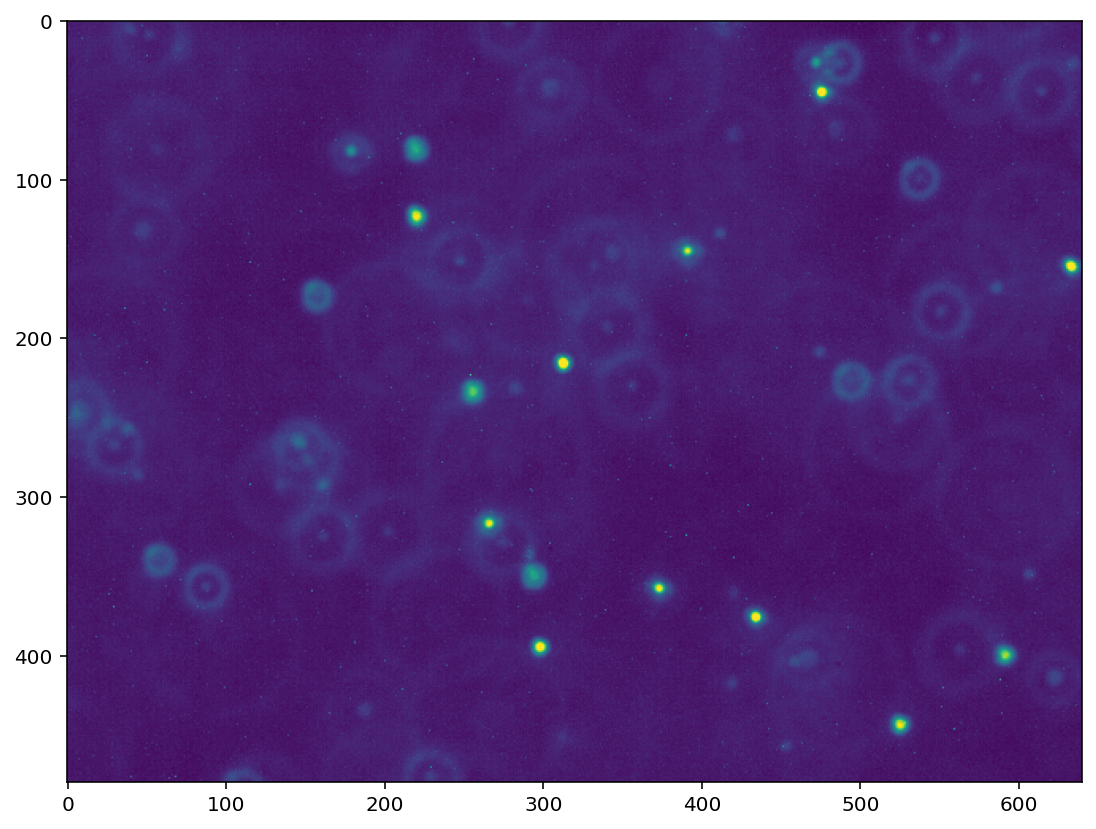

In [32]:
f = data[0,:,:] # extract the first frame

plt.imshow(f)

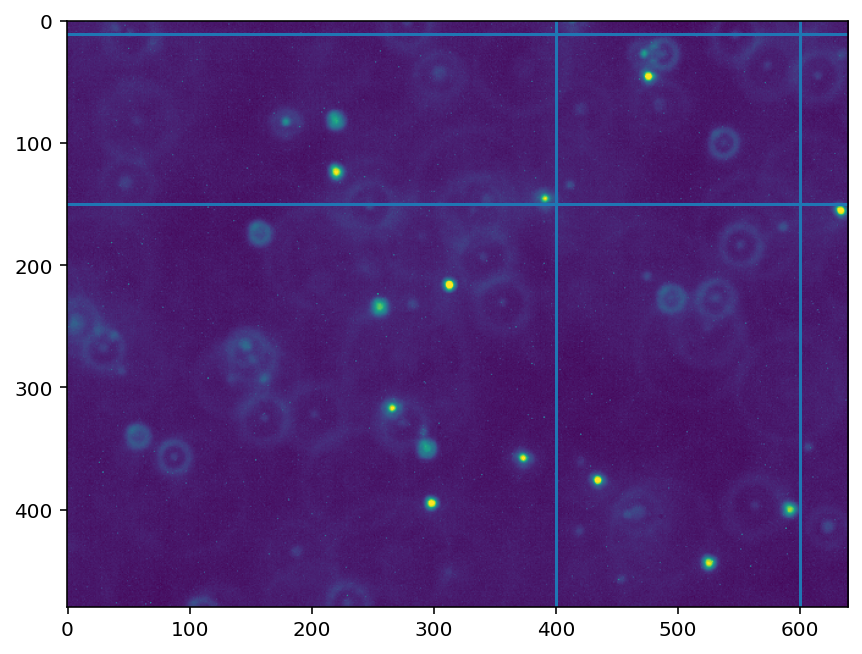

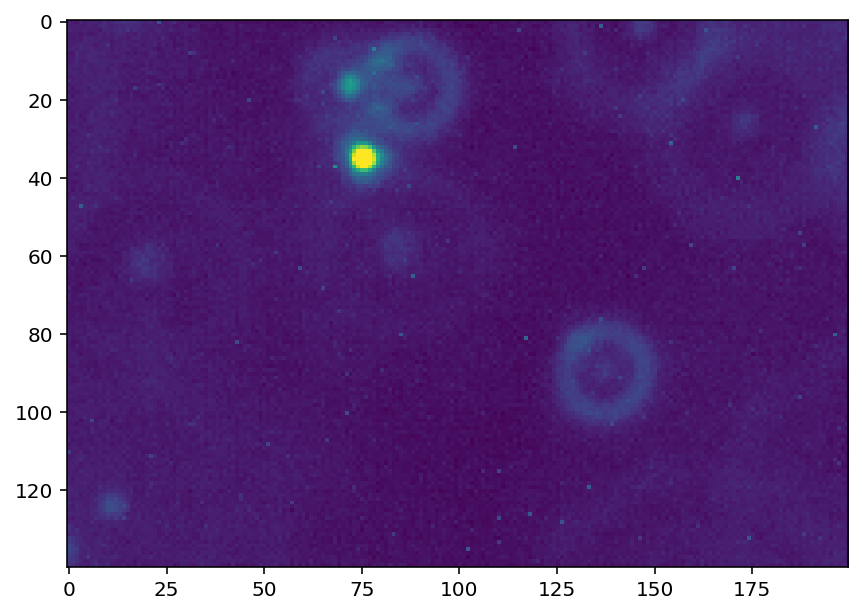

In [33]:
x_min = 400
x_max = 600
y_min = 10
y_max = 150

# Indicate cropping boundaries
plt.figure(figsize=(7,7))
plt.imshow(f)
plt.axvline(x_min)
plt.axvline(x_max)
plt.axhline(y_min)
plt.axhline(y_max)

f_cropped = data[0, y_min:y_max, x_min:x_max]

# Cropped figure
plt.figure(figsize=(7,7))
plt.imshow(f_cropped)

71.53571428571429 99.44642857142857


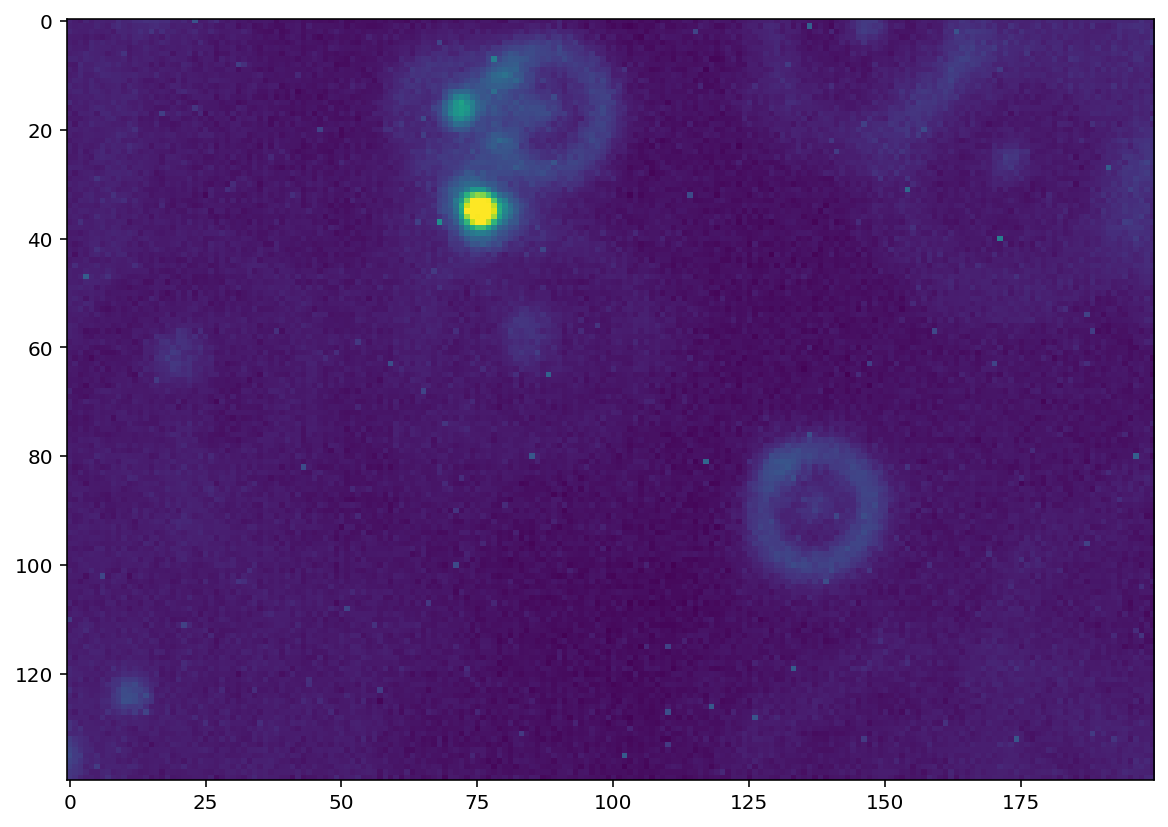

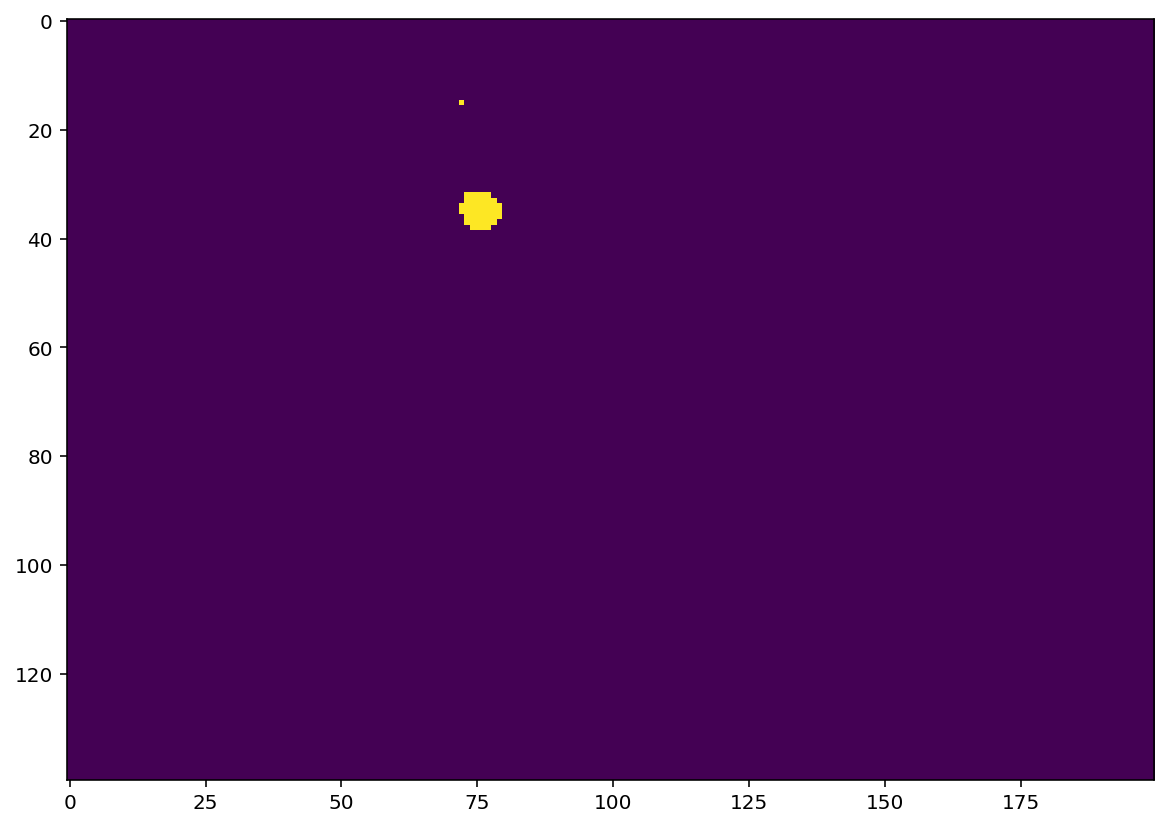

In [46]:
# Threshold value
t = 147

f = data[0, y_min:y_max, x_min:x_max]
plt.figure()
plt.imshow(f)

f_threshold = (f > t).astype(int)
plt.figure()
plt.imshow(f_threshold)

# Add code to determine blob coordinates
x, y =  largest_blob_coords(f, 0.9)
print(x,y)